In [14]:
import os
import netCDF4
import math
import numpy as np
from scipy.interpolate import griddata
import matplotlib.pyplot as plt
import time

In [2]:
def latlng_to_ch1900(lat, lng):
    lat = lat * 3600
    lng = lng * 3600
    lat_aux = (lat - 169028.66) / 10000
    lng_aux = (lng - 26782.5) / 10000
    x = 2600072.37 + 211455.93 * lng_aux - 10938.51 * lng_aux * lat_aux - 0.36 * lng_aux * lat_aux ** 2 - 44.54 * lng_aux ** 3 - 2000000
    y = 1200147.07 + 308807.95 * lat_aux + 3745.25 * lng_aux ** 2 + 76.63 * lat_aux ** 2 - 194.56 * lng_aux ** 2 * lat_aux + 119.79 * lat_aux ** 3 - 1000000
    return x, y

In [80]:
file = "./demo-data/Meteodata/2020/cosmo2_epfl_lakes_20201227.nc"
grid = {"minx": 490000, "miny": 110000, "maxx": 570000, "maxy": 160000, "dx": 1000, "dy": 1000}
nc = netCDF4.Dataset(file, mode='r', format='NETCDF4_CLASSIC')
lat = nc.variables["lat_1"][:]
lon = nc.variables["lon_1"][:]
mx, my = latlng_to_ch1900(lat, lon)
gx = np.arange(grid["minx"], grid["maxx"]+grid["dx"], grid["dx"])
gx = np.insert(gx, 0, math.floor(np.amin(mx)))
gx = np.append(gx, math.ceil(np.amax(mx)))
gy = np.arange(grid["miny"], grid["maxy"] + grid["dy"], grid["dy"])
gy = np.insert(gy, 0, math.floor(np.amin(my)))
gy = np.append(gy, math.ceil(np.amax(my)))
var = nc.variables["T_2M"][:]
data = var[0, :, :]
nc.close()
gxx, gyy = np.meshgrid(gx, gy)

In [93]:
def slow(mx, my, data, gx, gy):
    seconds = time.time()
    gxx, gyy = np.meshgrid(gx, gy)
    grid_interp = griddata((mx.flatten(),my.flatten()), data.flatten(), (gxx, gyy))
    grid_interp = grid_interp[1:-1,1:-1]
    print(time.time() - seconds)
    return grid_interp

In [106]:
def reduce_area(mx, my, data, gx, gy):
    seconds = time.time()
    gxx, gyy = np.meshgrid(gx, gy)
    mxx = mx.flatten()
    myy = my.flatten()
    dd = data.flatten()
    out = mxx >= grid["minx"] - 3 * grid["dx"]
    b = mxx <= grid["maxx"] + 3 * grid["dx"]
    c = myy >= grid["miny"] - 3 * grid["dy"]
    d = myy <= grid["maxy"] + 3 * grid["dy"]
    out = np.logical_and(out, b)
    out = np.logical_and(out, c)
    out = np.logical_and(out, d)
    s = np.where(out)
    grid_interp = griddata((mxx[s],myy[s]), dd[s], (gxx, gyy))
    grid_interp = grid_interp[1:-1,1:-1]
    print(time.time() - seconds)
    return grid_interp

In [107]:
a = slow(mx, my, data, gx, gy)

1.9403462409973145


In [108]:
b = reduce_area(mx, my, data, gx, gy)

0.06413960456848145


In [109]:
b

array([[271.5798692 , 271.57576   , 271.57026196, ..., 269.51289626,
        270.07427593, 269.0382167 ],
       [271.52688614, 271.55353107, 271.60689503, ..., 269.490064  ,
        269.4571793 , 268.52782954],
       [271.49997902, 271.4559821 , 271.52347242, ..., 269.92299957,
        269.34588695, 266.58052338],
       ...,
       [266.74268248, 266.04517938, 266.03990014, ..., 266.03316442,
        264.46684617, 262.59692354],
       [266.86287897, 266.52003563, 265.92674149, ..., 266.66440533,
        265.54029251, 263.13087763],
       [266.95042387, 266.67200368, 266.27670947, ..., 267.38431544,
        266.05447374, 262.73734082]])

In [110]:
a

array([[271.5798692 , 271.57576   , 271.57026196, ..., 269.51289626,
        270.07427593, 269.0382167 ],
       [271.52688614, 271.55353107, 271.60689503, ..., 269.490064  ,
        269.4571793 , 268.52782954],
       [271.49997902, 271.4559821 , 271.52347242, ..., 269.92299957,
        269.34588695, 266.58052338],
       ...,
       [266.74268248, 266.04517938, 266.03990014, ..., 266.03316442,
        264.46684617, 262.59692354],
       [266.86287897, 266.52003563, 265.92674149, ..., 266.66440533,
        265.54029251, 263.13087763],
       [266.95042387, 266.67200368, 266.27670947, ..., 267.38431544,
        266.05447374, 262.73734082]])

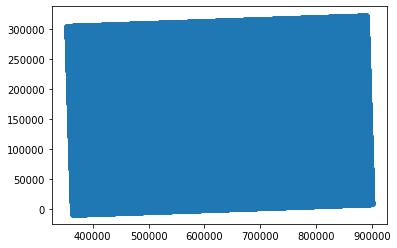

In [18]:
plt.scatter(mx,my)

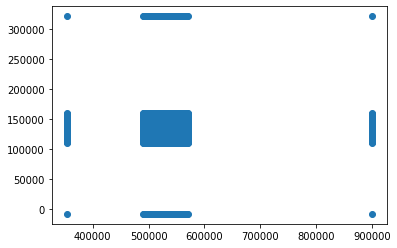

In [23]:
plt.scatter(gxx,gyy)

In [68]:
mask = all([np.amin(gx) >= mxx, mxx >= np.amax(gx), np.amin(gy) >= myy, myy >= np.amax(gy)])

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

In [111]:
mxx = mx.flatten()
myy = my.flatten()
dd = data.flatten()
out = mxx >= grid["minx"] - grid["dx"]
b = mxx <= grid["maxx"] + grid["dx"]
c = myy >= grid["miny"] - grid["dy"]
d = myy <= grid["maxy"] + grid["dy"]
out = np.logical_and(out, b)
out = np.logical_and(out, c)
out = np.logical_and(out, d)
s = np.where(out)

In [112]:
mxx[s]

masked_array(data=[536948.25, 538063.5, 539175.75, ..., 491730.25,
                   492842.5, 493954.75],
             mask=[False, False, False, ..., False, False, False],
       fill_value=1e+20)

In [113]:
out2 = np.logical_and(np.logical_and(out, b), np.logical_and(c, d))

In [114]:
out

masked_array(data=[False, False, False, ..., False, False, False],
             mask=False,
       fill_value=True)

In [115]:
out2

masked_array(data=[False, False, False, ..., False, False, False],
             mask=False,
       fill_value=True)

In [117]:
out3 = out == out2

In [119]:
all(out3)

True

(100, 200)

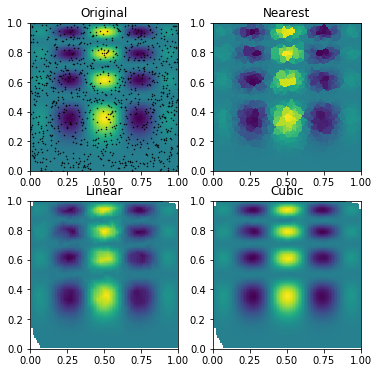

array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.01010101, 0.01010101, 0.01010101, ..., 0.01010101, 0.01010101,
        0.01010101],
       [0.02020202, 0.02020202, 0.02020202, ..., 0.02020202, 0.02020202,
        0.02020202],
       ...,
       [0.97979798, 0.97979798, 0.97979798, ..., 0.97979798, 0.97979798,
        0.97979798],
       [0.98989899, 0.98989899, 0.98989899, ..., 0.98989899, 0.98989899,
        0.98989899],
       [1.        , 1.        , 1.        , ..., 1.        , 1.        ,
        1.        ]])